In [ ]:
from zipfile import ZipFile 

# unzip the file 
zip_ref = ZipFile('/content/drive/MyDrive/Malaria tests/archive (4).zip') 
zip_ref.extractall('/content/drive/MyDrive/Malaria tests/')
zip_ref.close()

In [1]:
!ls '/content/drive/MyDrive/Malaria tests/cell_images'

cell_images  Parasitized  Uninfected


In [3]:
out_path = '/content/drive/MyDrive/Malaria tests/cell_images/cell_images'

In [10]:
import os 
os.listdir(out_path)

['Parasitized', 'Uninfected']

In [21]:
import pathlib 
malaria_path = pathlib.Path(out_path)
malaria_path

PosixPath('/content/drive/MyDrive/Malaria tests/cell_images/cell_images')

In [8]:
!ls out_path

ls: cannot access 'out_path': No such file or directory


In [22]:
# Get the top 5 images file path
len(list(malaria_path.glob('Uninfected/*.png')))

13779

In [23]:
list(malaria_path.glob('Uninfected/*.png'))[0]

PosixPath('/content/drive/MyDrive/Malaria tests/cell_images/cell_images/Uninfected/C85P46ThinF_IMG_20150820_105748_cell_10.png')

In [16]:
len(list(malaria_dict.glob('Parasitized/*.png')))

13779

### **20% of the Full Data** 
> I decided to use 20% of the data as the google colab cannot handle the FULL data at the Normalization stage. The RAM overloads and crashes as a result.

In [25]:
malaria_dict = {
    'uninfected' : list(malaria_path.glob('Uninfected/*.png'))[1000:3000], 
    'parasitized' : list(malaria_path.glob('Parasitized/*.png'))[1000:3000]
}

In [19]:
malaria_label = {
    'uninfected' : 0, 
    'parasitized' : 1
}

In [28]:
X, y = [], [] 

import cv2 
for image_cls, image_pth in malaria_dict.items(): 
  for image_p in image_pth: 
    img = cv2.imread(str(image_p))
    resized = cv2.resize(img, (150, 150)) 
    X.append(resized)
    y.append(malaria_label[image_cls])

### **CONVERT X and y to Numpy arrays**

In [33]:
import numpy as np
X_arr = np.array(X) 
y_arr = np.array(y)

In [35]:
X_arr.max(), X_arr.min()

(253, 0)

### **SPLIT THE DATASET RANDOMLY TO TRAINING, VALIDATING AND TESTING DATASET**

In [75]:
# import train_test_split 
# train_full and test data
from sklearn.model_selection import train_test_split 
X_train_full, X_test, y_train_full, y_test = train_test_split(X_arr, y_arr, 
                                                    random_state = 20, test_size = .15)

In [76]:
# train and test data
from sklearn.model_selection import train_test_split 
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, 
                                                      y_train_full, 
                                                      random_state = 20, 
                                                      test_size = .10)

### **NORMALIZE(RESCALE) ALL THE IMAGES TO BETWEEN 0 AND 1**

In [77]:
X_train.max(), X_test.max(), X_valid.max()

(253, 248, 240)

In [78]:
import pandas as pd 
pd.Series(y_train).value_counts()

1    1534
0    1526
dtype: int64

In [79]:
X_train_scaled = X_train / 253.0

In [80]:
X_valid_scaled = X_valid / 240.0

In [81]:
X_test_scaled = X_test / 248.0

In [46]:
len(X_train_scaled)

2560

In [50]:
np.arange(4)

array([0, 1, 2, 3])

### **PLOT RANDOM UNINFECTED AND PARASITIZED IMAGES TO AUTHETICATE THAT THE IMAGES MATCH THE CLASS**

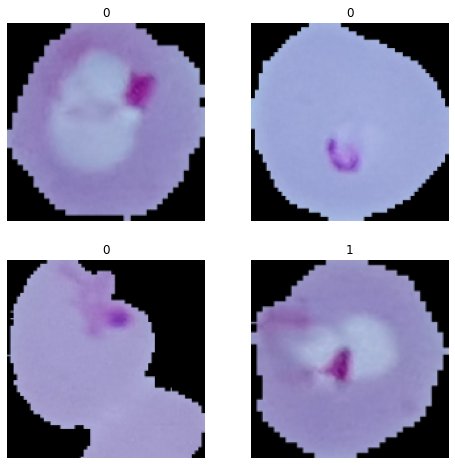

In [69]:
#import PIL 
import matplotlib.pyplot as plt
#plt.imshow(X_train_scaled[0])
#PIL.Image.open() 
import random 
plt.figure(figsize = (8, 8))
for i in range(4):  
  ax = plt.subplot(2, 2, i+1)
  rand_int = random.choice(range(len(X_train_scaled))) 
  plt.imshow(X_train_scaled[rand_int])
  plt.title(y_arr[rand_int])
  plt.axis(False)

### **BUILD A CNN MODEL**

In [70]:
# import necessary libraries 
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout 

In [71]:
from tensorflow.keras import Sequential 
from tensorflow.keras.optimizers import Adam

In [82]:
# create a model 
cnn_1 = Sequential([
    Conv2D(filters = 15, 
           kernel_size = 3, # can also be (3, 3) 
           padding = 'same', 
           activation = 'relu', 
           input_shape = (150, 150, 3)), 
    Conv2D(16, 3, padding = 'same', activation = 'relu'), 
    MaxPool2D(),
    Conv2D(16, 3, padding = 'same', activation = 'relu'), 
    MaxPool2D(),
    Flatten(), 
    Dense(250, activation = 'relu'),
    Dense(2, activation = 'sigmoid')
])

In [83]:
# compile the model
cnn_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer = tf.keras.optimizers.Adam(), 
              metrics = ['accuracy'])

In [84]:
history_1 = cnn_1.fit(x = X_train_scaled, 
                      y = y_train,  
                      epochs = 20, validation_data = (X_valid_scaled, y_valid)) 

Epoch 1/20
96/96 [==============================] - 126s 1s/step - loss: 0.7137 - accuracy: 0.5765 - val_loss: 0.5879 - val_accuracy: 0.6912
Epoch 2/20
96/96 [==============================] - 117s 1s/step - loss: 0.5025 - accuracy: 0.7709 - val_loss: 0.5290 - val_accuracy: 0.7794
Epoch 3/20
96/96 [==============================] - 122s 1s/step - loss: 0.2699 - accuracy: 0.9059 - val_loss: 0.2144 - val_accuracy: 0.9412
Epoch 4/20
96/96 [==============================] - 122s 1s/step - loss: 0.1631 - accuracy: 0.9474 - val_loss: 0.1899 - val_accuracy: 0.9471
Epoch 5/20
96/96 [==============================] - 117s 1s/step - loss: 0.1030 - accuracy: 0.9667 - val_loss: 0.2209 - val_accuracy: 0.9118
Epoch 6/20
96/96 [==============================] - 122s 1s/step - loss: 0.0601 - accuracy: 0.9820 - val_loss: 0.2164 - val_accuracy: 0.9588
Epoch 7/20
96/96 [==============================] - 122s 1s/step - loss: 0.0344 - accuracy: 0.9902 - val_loss: 0.2415 - val_accuracy: 0.9588
Epoch 8/20
96

### **MODEL SUMMARY**

In [99]:
# model summaru 
cnn_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 15)      420       
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 16)      2176      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 21904)            

### **MODEL EVALUATION**

In [85]:
cnn_1.evaluate(X_test_scaled, y_test)

19/19 [==============================] - 7s 350ms/step - loss: 0.6214 - accuracy: 0.9250


[0.6213775873184204, 0.925000011920929]

### **LOSS AND ACCURACY CURVE**

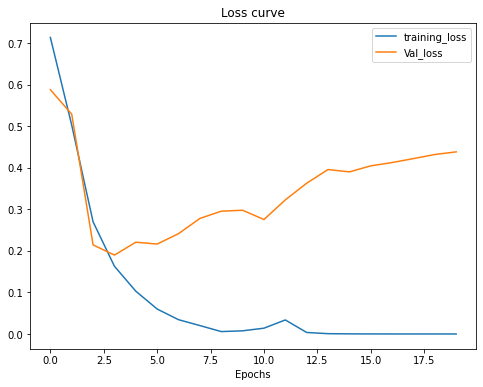

In [98]:
# plot loss curve 
plt.figure(figsize = (8, 6))
loss = history_1.history['loss']
val_loss = history_1.history['val_loss'] 
epochs = range(len(history_1.history['loss']))
plt.plot(epochs, loss, label = 'training_loss')
plt.plot(epochs, val_loss, label = 'Val_loss')
plt.xlabel('Epochs')
plt.title('Loss curve')
plt.legend()

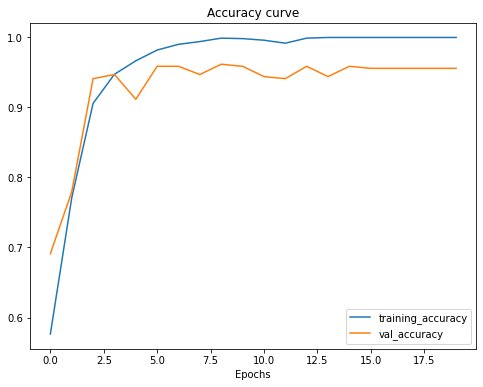

In [97]:
# plot accuracy curve 
plt.figure(figsize = (8, 6))
accuracy = history_1.history['accuracy']
val_accuracy = history_1.history['val_accuracy'] 
epochs = range(len(history_1.history['loss']))
plt.plot(epochs, accuracy, label = 'training_accuracy')
plt.plot(epochs, val_accuracy, label = 'val_accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy curve')
plt.legend();

### **TEST DATA PREDICTION**

In [86]:
pred_probs = cnn_1.predict(X_test_scaled)
pred_probs[0]

19/19 [==============================] - 8s 360ms/step


array([9.9783969e-01, 2.2916033e-06], dtype=float32)

In [100]:
# get the class with the max probabilities 
y_pred = tf.argmax(pred_probs, axis = 1)
y_pred[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0])>

### **CONFUSION MATRIX AND CLASSIFICATION REPORT**

In [101]:
# confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_true=y_test, 
                 y_pred=y_pred)

array([[282,  12],
       [ 33, 273]])

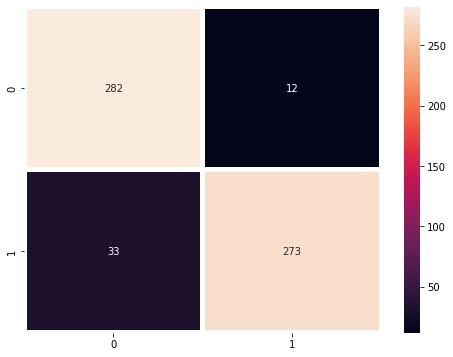

In [104]:
# prettified confusion matrix
import seaborn as sns
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_true=y_test, 
                 y_pred=y_pred), annot = True, fmt = 'd', linewidth = 4)
plt.show()

In [106]:
# classification_report
print(classification_report(y_true=y_test, 
                 y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       294
           1       0.96      0.89      0.92       306

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.92       600
weighted avg       0.93      0.93      0.92       600



### **SAVE THE MODEL**

In [107]:
cnn_1.save('maladria_detection_class.h5')

In [ ]:
uninfected_use = uninfected[:2756] 
len(uninfected_use)

2756

In [ ]:
parasitized_use = parasitized[:2756]
len(parasitized_use)

2756

### **UNINFECTED AND PARASITIZED DICTIONARY**

In [ ]:
malaria_dict = {'uninfected' : list(uninfected_use), 
                'parasitized' : list(parasitized_use)}

In [ ]:
malaria_status_labels = {'uninfected' : 0, 
                         'parasitized' : 1}

In [ ]:
malaria_status_labels

{'uninfected': 0, 'parasitized': 1}

In [ ]:
malaria_dict['parasitized'][:5]

['/content/drive/MyDrive/Malaria tests/cell_images/Parasitized/C92P53ThinF_IMG_20150821_151224_cell_209.png',
 '/content/drive/MyDrive/Malaria tests/cell_images/Parasitized/C92P53ThinF_IMG_20150821_151224_cell_210.png',
 '/content/drive/MyDrive/Malaria tests/cell_images/Parasitized/C92P53ThinF_IMG_20150821_151224_cell_211.png',
 '/content/drive/MyDrive/Malaria tests/cell_images/Parasitized/C92P53ThinF_IMG_20150821_151224_cell_212.png',
 '/content/drive/MyDrive/Malaria tests/cell_images/Parasitized/C92P53ThinF_IMG_20150821_151646_cell_201.png']

In [ ]:
import cv2 
img = cv2.imread(malaria_dict['parasitized'][150]) 
img.shape

(112, 118, 3)

In [ ]:
cv2.resize(uninfected_use, (100, 100))

error: ignored

In [ ]:
import cv2 
d_arr_ufu = [cv2.imread(y) for y in uninfected_use] 

In [ ]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [ ]:
d_arr_ufu[2755].shape

(169, 169, 3)

In [ ]:
 i = np.arange(2755)
 resized_ufu = [cv2.resize(y, (115, 115)) for y[i] in d_arr_ufu]
 # resized_ufu = cv2.resize(d_ufu_nparr, (150, 150)) 

TypeError: ignored

In [ ]:
d_arr_ufu[1000].shape

(112, 118, 3)

In [ ]:
import numpy as np
d_ufu_nparr = np.array(d_arr_ufu, dtype = 'object')

In [ ]:
d_ufu_nparr.shape

(2756,)

In [ ]:
d_ufu_nparr.dtype

dtype('O')

In [ ]:
d_ufu =  d_ufu_nparr.astype(np.uint8)

ValueError: ignored

In [ ]:
X, y = [], [] 

import cv2 
for image_cls, image_pth in malaria_dict.items(): 
  for image_p in image_pth: 
    img = cv2.imread(image_p)
    resized = cv2.resize(img, (150, 150)) 
    X.append(resized)
    y.append(malaria_status_labels[image_cls])

error: ignored

In [ ]:
malaria_status_labels['Parasitized']

1